<div align="center">

## Clase 1: Introducción a Python: profit de opciones

</div>

En este cuaderno se presenta una introducción breve a Python, con el objetivo de graficar el profit de una cartera de opciones. Aprenderá a usar Python como calculadora, crear funciones propias y hacer gráficos. No se asume conocimientos de programación, pero sí saber qué es una opción call y put Europea. Al final del cuaderno están las referencias consultadas.

**Profesor:** Ricardo Huamán Aguilar (rhuaman@pucp.pe)  
**Departamento de Economía - Sección Finanzas**  
**Pontificia Universidad Católica del Perú**


#### Instalar módulo básicos


In [37]:
import math ## para el número pi, etc.
import numpy as np ## para las matrices

#Para hacer gráficos
import matplotlib
from matplotlib import pyplot as plt 

#### CALL: Payoff de posición larga

In [38]:
# Creamos la función
def payoff_opcion_call(S, K):
    return np.max([S-K, 0])

In [39]:
# Ejecutamos la función
K = 200
S = 230
payoff_opcion_call(S, K)

30

In [40]:
K = 200
S = 100
payoff_opcion_call(S, K)

0

In [41]:
# La función anterior no acepta un vector de precios del activo subyacente 

In [42]:
# payoff_opcion_call([150,200,250],K) ## Esto no funciona

In [43]:
S_vector = np.linspace(150,250,11)
S_vector

array([150., 160., 170., 180., 190., 200., 210., 220., 230., 240., 250.])

In [44]:
# payoff_opcion_call(S_vector,K) #  Esto no funciona

In [45]:
v_payoff_opcion_call = np.vectorize(payoff_opcion_call) #Esta función permite que se acepten vectores

In [46]:
payoff_call = v_payoff_opcion_call(S_vector,K)
payoff_call

array([ 0.,  0.,  0.,  0.,  0.,  0., 10., 20., 30., 40., 50.])

In [47]:
S_vector

array([150., 160., 170., 180., 190., 200., 210., 220., 230., 240., 250.])

#### CALL: Profit de posición larga

In [48]:
# Creamos la función
def v_profit_opcion_call(S,K,prima_call):
    return v_payoff_opcion_call(S,K) - prima_call

In [49]:
S_vector

array([150., 160., 170., 180., 190., 200., 210., 220., 230., 240., 250.])

In [50]:
prima = 20
profit_call = v_profit_opcion_call(S_vector,K,prima)
profit_call

array([-20., -20., -20., -20., -20., -20., -10.,   0.,  10.,  20.,  30.])

In [51]:
payoff_call - profit_call # Debe ser igual a la prima

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.])

#### Graficamos

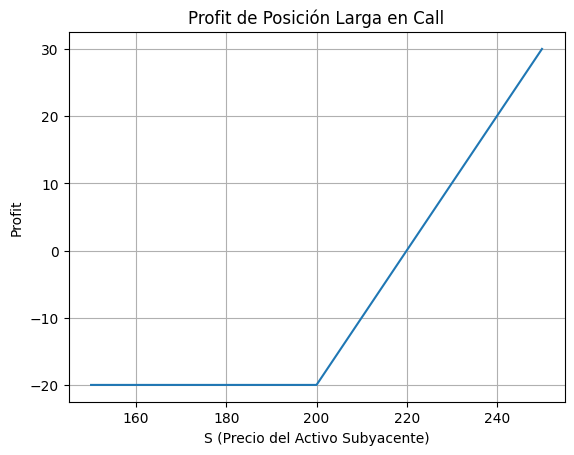

In [52]:
# Agregamos nombre a los ejes
plt.plot(S_vector, profit_call)
plt.xlabel('S (Precio del Activo Subyacente)')
plt.ylabel('Profit')
plt.title('Profit de Posición Larga en Call')
plt.grid()

#### PUT: Payoff y Profit

In [53]:
# Creamos la función PAYOFF:
def payoff_opcion_put(S, K):
    return np.max([K-S, 0])

# Para que acepte los vectores:
v_payoff_opcion_put = np.vectorize(payoff_opcion_put)

In [54]:
v_payoff_opcion_put(S_vector,200)

array([50., 40., 30., 20., 10.,  0.,  0.,  0.,  0.,  0.,  0.])

In [55]:
# Creamos la función PROFIT:
def v_profit_opcion_put(S,K,prima_put):
    return v_payoff_opcion_put(S,K) - prima_put

In [56]:
profit_put = v_profit_opcion_put(S_vector,200,19)
profit_put

array([ 31.,  21.,  11.,   1.,  -9., -19., -19., -19., -19., -19., -19.])

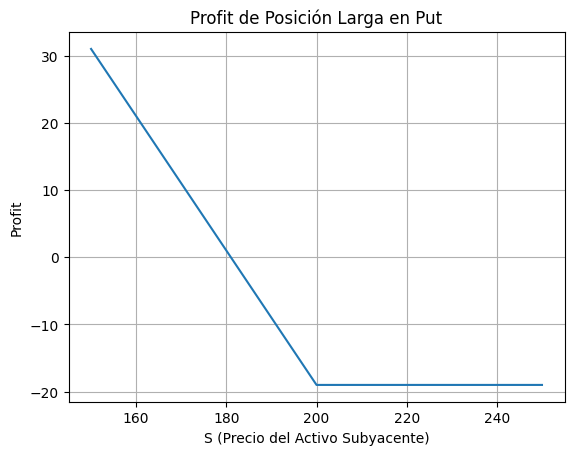

In [57]:
# Graficamos:
plt.plot(S_vector, profit_put)
plt.xlabel('S (Precio del Activo Subyacente)')
plt.ylabel('Profit')
plt.title('Profit de Posición Larga en Put')
plt.grid()

#### Cartera de Inversión
- Posición larga en 1 call(s)
- Posición larga en 1 put(s)

¿Cuál es el profit de la cartera?

In [58]:
K = 200              # Precio strike
prima_call = 20
prima_put = 19
n_calls = 1
n_puts = 1

profit_cartera = n_calls*v_profit_opcion_call(S_vector,K,prima_call) + n_puts*v_profit_opcion_put(S_vector,K,prima_put)
profit_cartera

array([ 11.,   1.,  -9., -19., -29., -39., -29., -19.,  -9.,   1.,  11.])

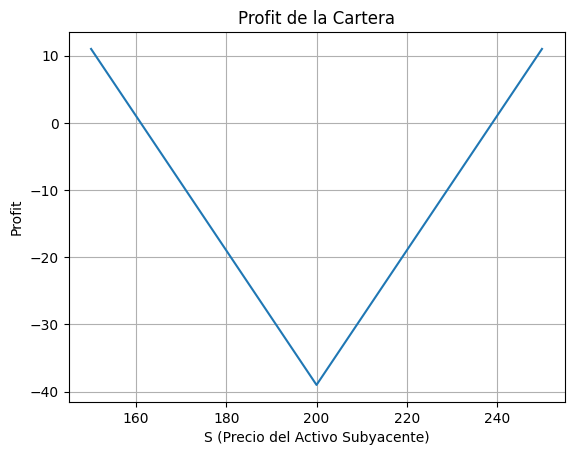

In [59]:
# Graficamos:
plt.plot(S_vector, profit_cartera)
plt.xlabel('S (Precio del Activo Subyacente)')
plt.ylabel('Profit')
plt.title('Profit de la Cartera')
plt.grid()

#### Enlaces Consultados:

Para instalar Anaconda: https://www.anaconda.com/products/individual-d

Introducción a Jupyter (video): https://www.youtube.com/watch?v=6Vf9ZUntCyE

Introducción a Matplotlib (video en Inglés): https://www.youtube.com/watch?v=UO98lJQ3QGI

Para vectorización en Numpy: https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html

Introducción a Numpy (PDF): https://readthedocs.org/projects/matplotlibguide/downloads/pdf/latest/

Para "shortcuts" en Jupyter: https://towardsdatascience.com/jupyter-notebook-shortcuts-bf0101a98330